| Problem | Formula|Search Domain|
|---      |----    |----|
|Kur1|${\text{Min}}={\begin{cases}f_{1}\left(x_1,x_2,....,x_n\right)=\sum_{i=1}^{n-1}-10exp^{-0.2\sqrt{x^2_{i}+x^2_{i+1}}}\\f_{2}\left(x_1,x_2,....,x_n\right)=\sum^{n}_{i=1}\|x_i\|^{0.8}+5sinx_i^3\\\end{cases}}$|$-5.05\leq{x_i}\leq{5}, i=1..n$|




In [325]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['Alg_name','Iteration','Evaluations'],ascending =True).reset_index(drop=True)
    return output_result
cdir =os.getcwd()

# Kursawe problem 
## - (#variables / #objectives)
## - 2/2
## - 3/2
## - 4/2
## - 5/2
 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [326]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='KUR1'].reset_index(drop=True)
print(f"The number of records {len(result)}")

The number of records 192


In [327]:
#path and image path indicating location of objective file and visualization file
result.iloc[:,-2:].head(5)

,path,image_location
0,KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-100_Obj...,Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_Iterati...
1,KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-100_Obj...,Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_Iterati...
2,KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-200_Obj...,Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_Iterati...
3,KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-500_Obj...,Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_Iterati...
4,KUR1/NSGA2_KUR1_2/KUR1_NSGA2_Iteration-200_Obj...,Images/KUR1/NSGA2_KUR1Var-2/KUR1_NSGA2_Iterati...


In [328]:
# filter kursawe problem based on number of variables
kur1_2 = result.loc[result['n_variables']==2].reset_index(drop=True) # dimension 2 
kur1_3 = result.loc[result['n_variables']==3].reset_index(drop=True) # dimension 3 
kur1_4 = result.loc[result['n_variables']==4].reset_index(drop=True) # dimension 4 
kur1_5 = result.loc[result['n_variables']==5].reset_index(drop=True) # dimension 5

# Kur1 with two variables

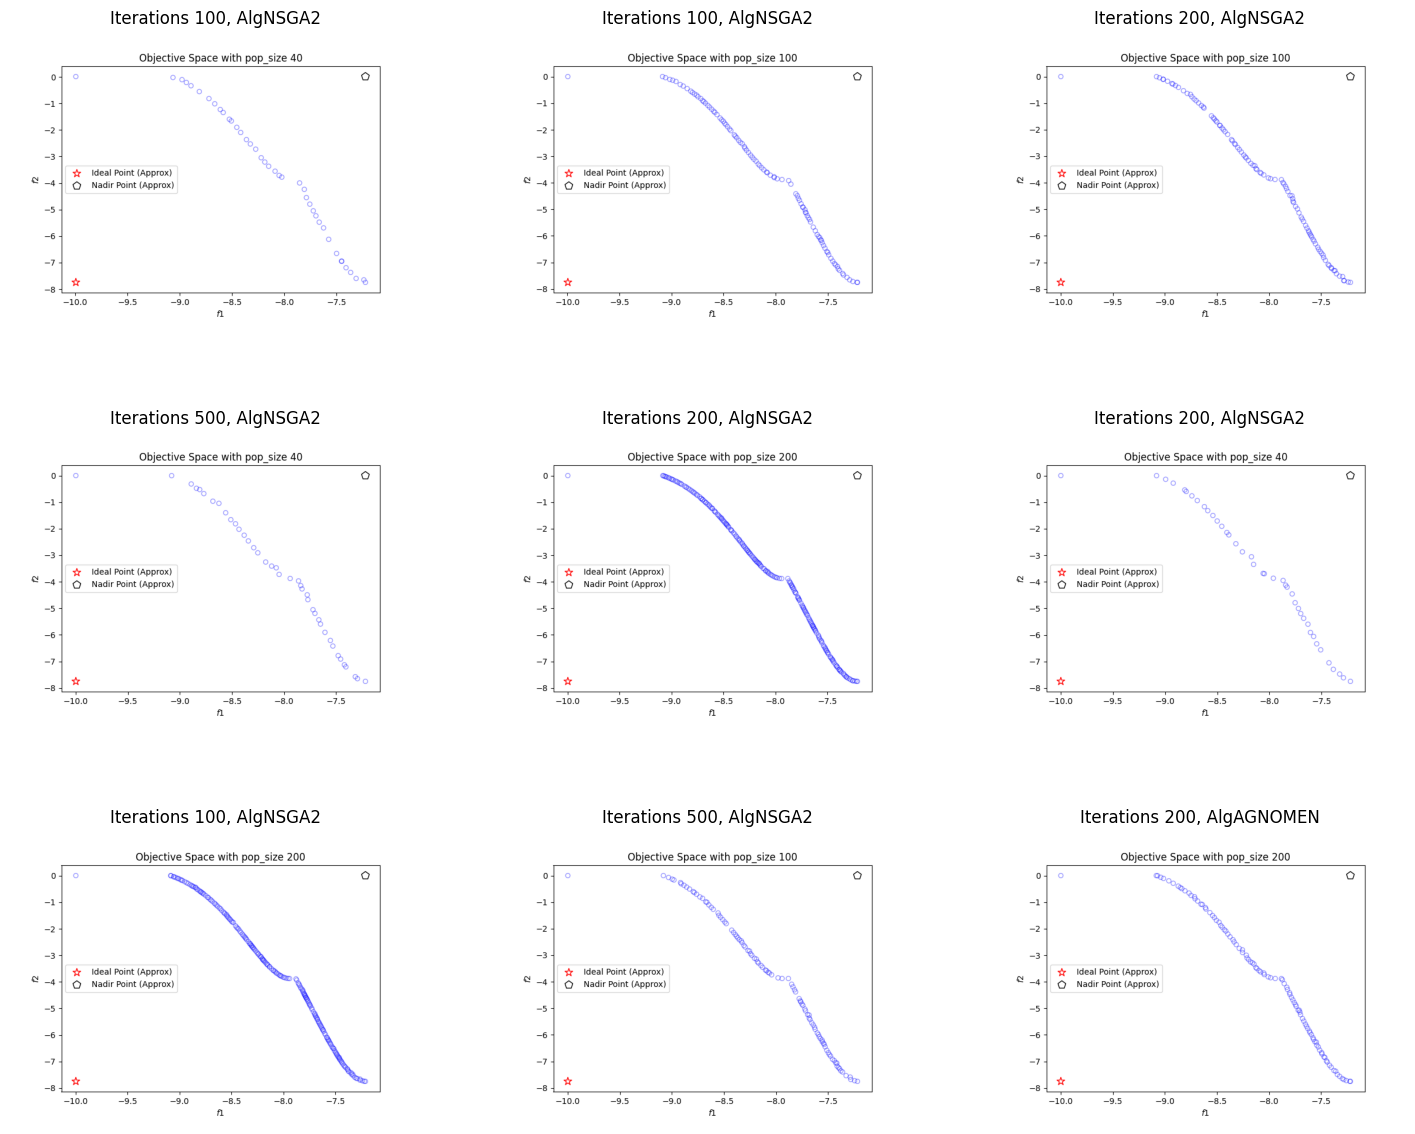

In [329]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_2['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_2.Iteration[i]}, Alg{kur1_2.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [331]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_2['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-7.2  ,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
hv_result(kur1_2)

Global nadir point for kur1 with two variables is :[-7.2   0.16]
ref_point is [-7.2  0. ]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,2,200,2.399754,6.427532,0.007248,0.003550
1,KUR1,AGNOMEN,10000,100,2,2,100,2.412751,6.427532,0.007248,0.002406
2,KUR1,AGNOMEN,10000,100,2,2,40,2.543084,6.427532,0.007248,0.002479
3,KUR1,AGNOMEN,20000,200,2,2,200,4.977178,6.430784,0.006403,0.009019
4,KUR1,AGNOMEN,20000,200,2,2,100,5.210066,6.430784,0.006403,0.003298
5,KUR1,AGNOMEN,20000,200,2,2,40,4.962893,6.430784,0.006403,0.001783
6,KUR1,AGNOMEN,50000,500,2,2,100,13.667304,6.438678,0.006009,0.002199
7,KUR1,AGNOMEN,50000,500,2,2,40,14.506533,6.438678,0.006009,0.005307
8,KUR1,AGNOMEN,50000,500,2,2,200,13.370080,6.438678,0.006009,0.001645
9,KUR1,AGNOMEN,100000,1000,2,2,200,26.320026,6.431985,0.006329,0.001525


In [332]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_2_pf' ))
hv_result(kur1_2)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,2,200,2.399754,99.478321,0.007248,0.001775
1,KUR1,AGNOMEN,10000,100,2,2,100,2.412751,99.478321,0.007248,0.002285
2,KUR1,AGNOMEN,10000,100,2,2,40,2.543084,99.478321,0.007248,0.002608
3,KUR1,AGNOMEN,20000,200,2,2,200,4.977178,99.484979,0.006403,0.002701
4,KUR1,AGNOMEN,20000,200,2,2,100,5.210066,99.484979,0.006403,0.001757
5,KUR1,AGNOMEN,20000,200,2,2,40,4.962893,99.484979,0.006403,0.002093
6,KUR1,AGNOMEN,50000,500,2,2,100,13.667304,99.496279,0.006009,0.002874
7,KUR1,AGNOMEN,50000,500,2,2,40,14.506533,99.496279,0.006009,0.001574
8,KUR1,AGNOMEN,50000,500,2,2,200,13.370080,99.496279,0.006009,0.001518
9,KUR1,AGNOMEN,100000,1000,2,2,200,26.320026,99.489595,0.006329,0.001532


# Kur1 with three variables

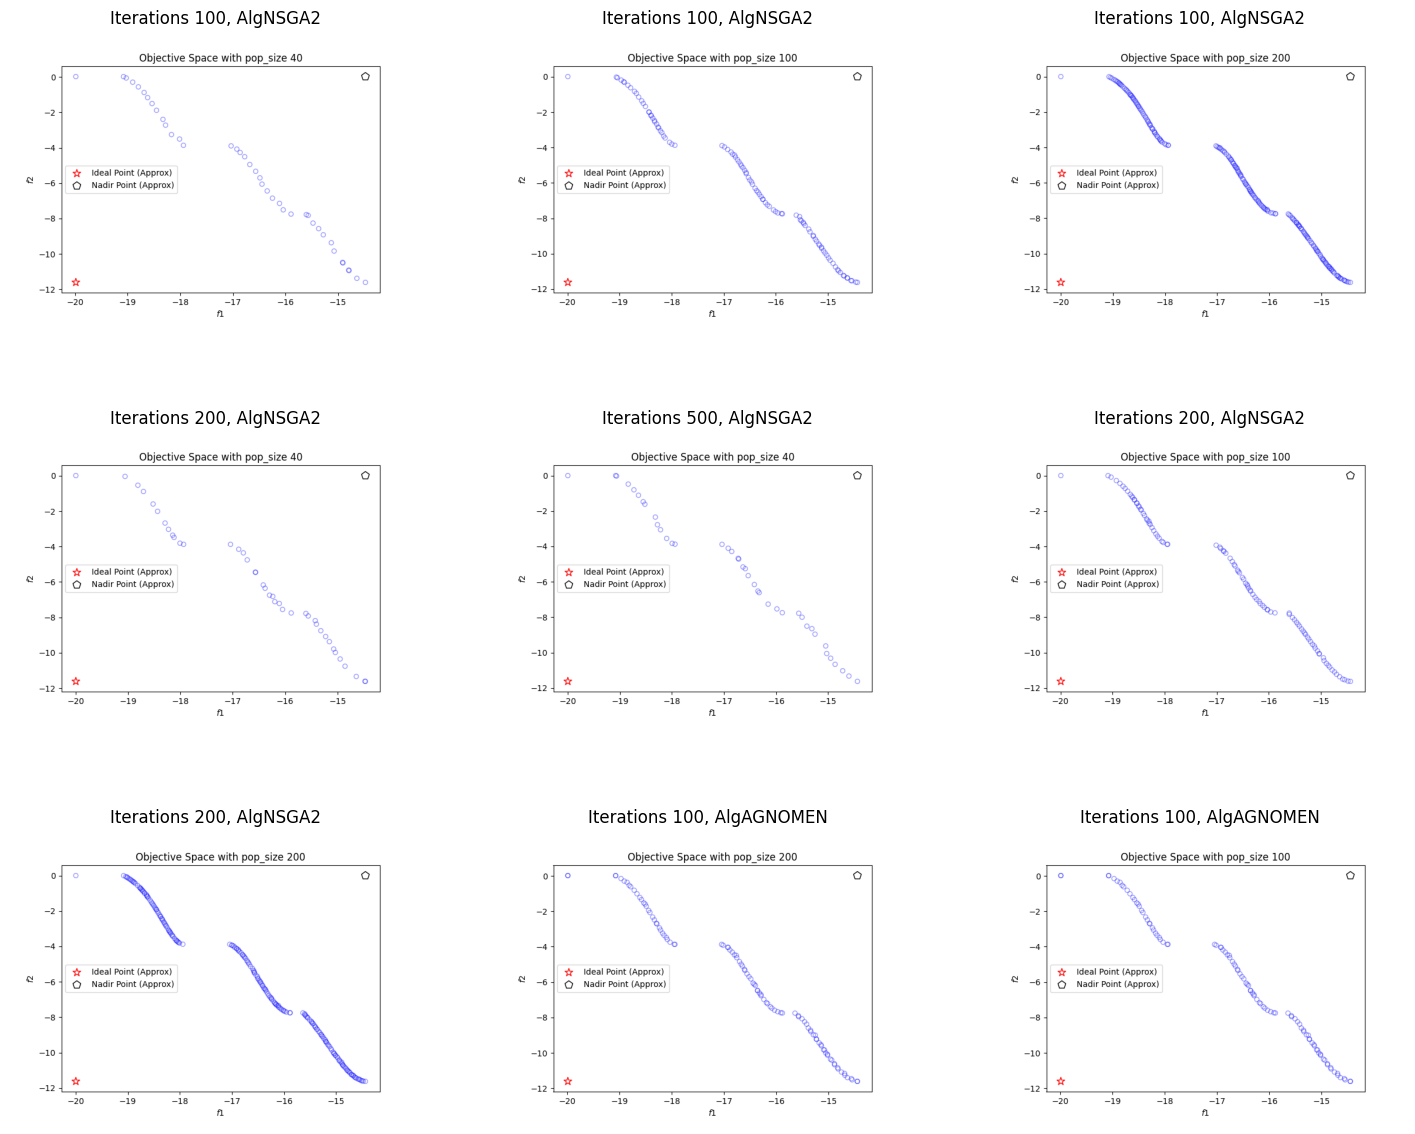

In [333]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_3['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_3.Iteration[i]}, Alg{kur1_3.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [334]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_3['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-14,0]) #check figure 
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
hv_result(kur1_3)

Global nadir point for kur1 with two variables is :[-14.43   2.37]
ref_point is [-14   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,3,200,2.306263,30.977622,0.016789,0.003955
1,KUR1,AGNOMEN,10000,100,2,3,100,2.354377,30.977622,0.016789,0.002403
2,KUR1,AGNOMEN,10000,100,2,3,40,2.263241,30.977622,0.016789,0.003851
3,KUR1,AGNOMEN,20000,200,2,3,40,4.695914,31.038231,0.012355,0.004984
4,KUR1,AGNOMEN,20000,200,2,3,100,4.717566,31.038231,0.012355,0.002074
5,KUR1,AGNOMEN,20000,200,2,3,200,4.712471,31.038231,0.012355,0.001877
6,KUR1,AGNOMEN,50000,500,2,3,40,12.087581,31.030750,0.012675,0.001554
7,KUR1,AGNOMEN,50000,500,2,3,100,12.905472,31.030750,0.012675,0.002310
8,KUR1,AGNOMEN,50000,500,2,3,200,12.950954,31.030750,0.012675,0.001491
9,KUR1,AGNOMEN,100000,1000,2,3,100,25.761911,31.042944,0.011844,0.002336


In [335]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_3_pf' ))
hv_result(kur1_3)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,3,200,2.306263,276.835002,0.016789,0.004604
1,KUR1,AGNOMEN,10000,100,2,3,100,2.354377,276.835002,0.016789,0.002573
2,KUR1,AGNOMEN,10000,100,2,3,40,2.263241,276.835002,0.016789,0.001904
3,KUR1,AGNOMEN,20000,200,2,3,40,4.695914,277.180787,0.012355,0.001895
4,KUR1,AGNOMEN,20000,200,2,3,100,4.717566,277.180787,0.012355,0.001510
5,KUR1,AGNOMEN,20000,200,2,3,200,4.712471,277.180787,0.012355,0.001559
6,KUR1,AGNOMEN,50000,500,2,3,40,12.087581,277.185078,0.012675,0.002041
7,KUR1,AGNOMEN,50000,500,2,3,100,12.905472,277.185078,0.012675,0.001617
8,KUR1,AGNOMEN,50000,500,2,3,200,12.950954,277.185078,0.012675,0.001599
9,KUR1,AGNOMEN,100000,1000,2,3,100,25.761911,277.197131,0.011844,0.002219


# Kur1 with four variables

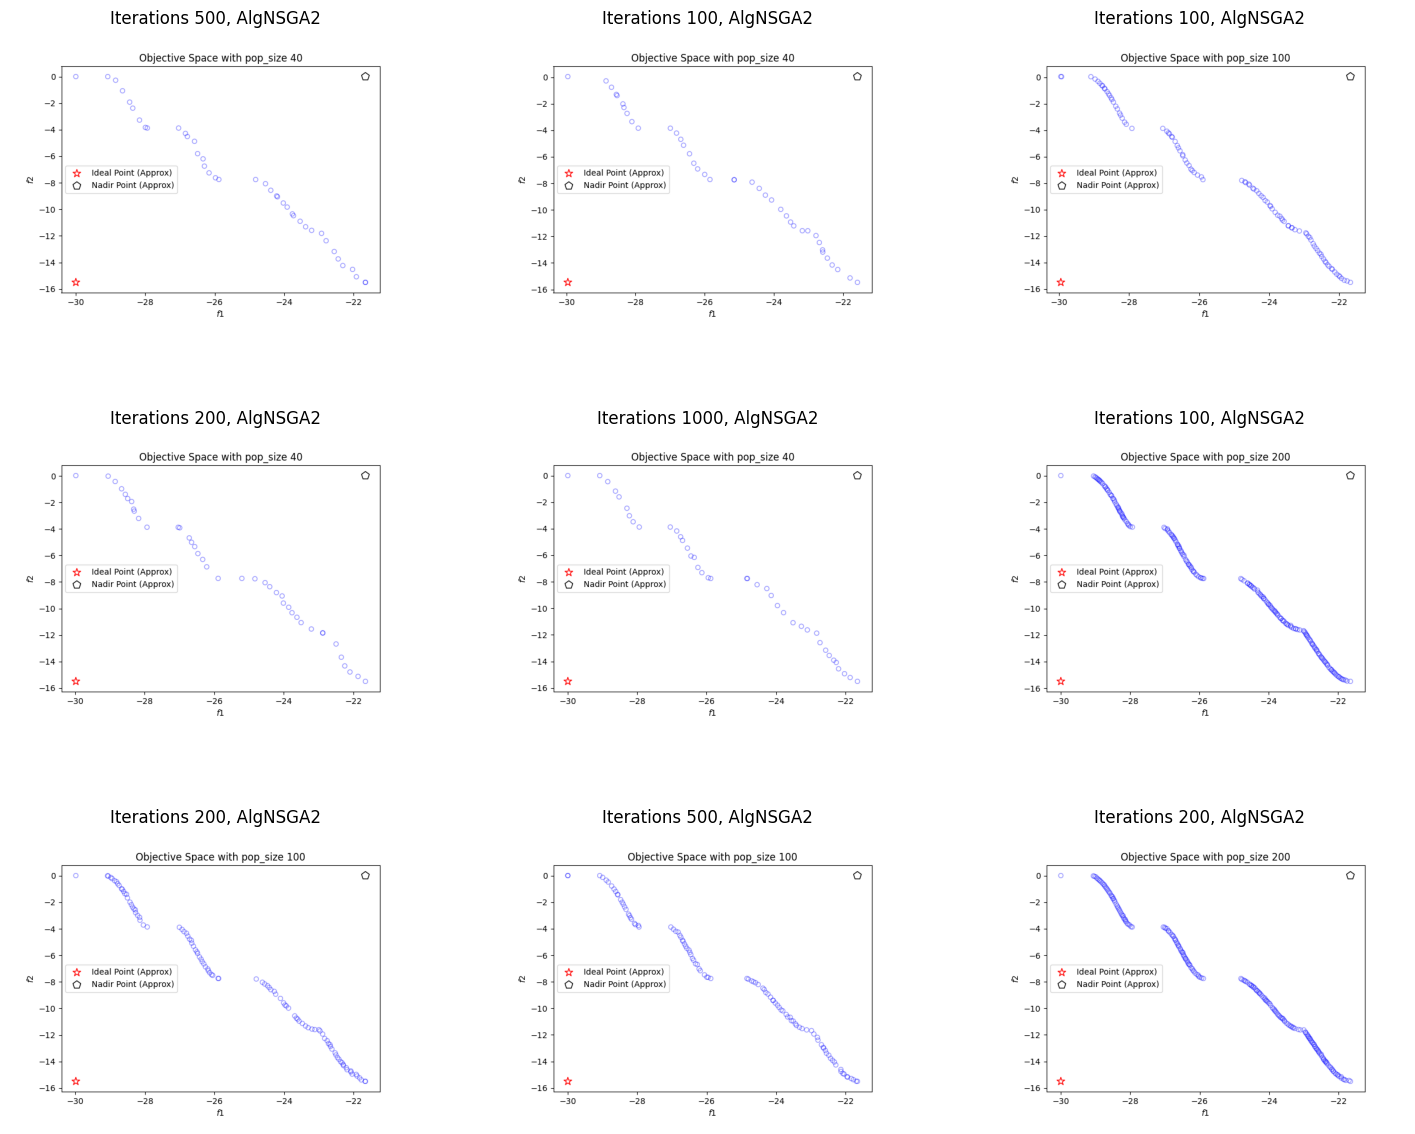

In [318]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_4['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_4.Iteration[i]}, Alg{kur1_4.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [336]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_4['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-21 ,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
hv_result(kur1_4)

Global nadir point for kur1 with two variables is :[-21.58   0.59]
ref_point is [-21   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,4,40,2.192779,66.743744,0.024370,0.001695
1,KUR1,AGNOMEN,10000,100,2,4,100,2.225367,66.743744,0.024370,0.001820
2,KUR1,AGNOMEN,10000,100,2,4,200,2.233284,66.743744,0.024370,0.001521
3,KUR1,AGNOMEN,20000,200,2,4,40,4.770670,66.901453,0.021247,0.001740
4,KUR1,AGNOMEN,20000,200,2,4,100,4.989688,66.901453,0.021247,0.001442
5,KUR1,AGNOMEN,20000,200,2,4,200,4.717473,66.901453,0.021247,0.001440
6,KUR1,AGNOMEN,50000,500,2,4,40,12.562356,66.984679,0.017311,0.001431
7,KUR1,AGNOMEN,50000,500,2,4,100,12.364127,66.984679,0.017311,0.001519
8,KUR1,AGNOMEN,50000,500,2,4,200,12.392806,66.984679,0.017311,0.001544
9,KUR1,AGNOMEN,100000,1000,2,4,40,25.363364,67.001616,0.018020,0.001654


In [337]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_4_pf' ))
hv_result(kur1_4)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,4,40,2.192779,521.441836,0.024370,0.003167
1,KUR1,AGNOMEN,10000,100,2,4,100,2.225367,521.441836,0.024370,0.001857
2,KUR1,AGNOMEN,10000,100,2,4,200,2.233284,521.441836,0.024370,0.001633
3,KUR1,AGNOMEN,20000,200,2,4,40,4.770670,521.898610,0.021247,0.003527
4,KUR1,AGNOMEN,20000,200,2,4,100,4.989688,521.898610,0.021247,0.001694
5,KUR1,AGNOMEN,20000,200,2,4,200,4.717473,521.898610,0.021247,0.001914
6,KUR1,AGNOMEN,50000,500,2,4,40,12.562356,522.031543,0.017311,0.001478
7,KUR1,AGNOMEN,50000,500,2,4,100,12.364127,522.031543,0.017311,0.001455
8,KUR1,AGNOMEN,50000,500,2,4,200,12.392806,522.031543,0.017311,0.001516
9,KUR1,AGNOMEN,100000,1000,2,4,40,25.363364,522.061134,0.018020,0.001475


# Kur1 with five variables

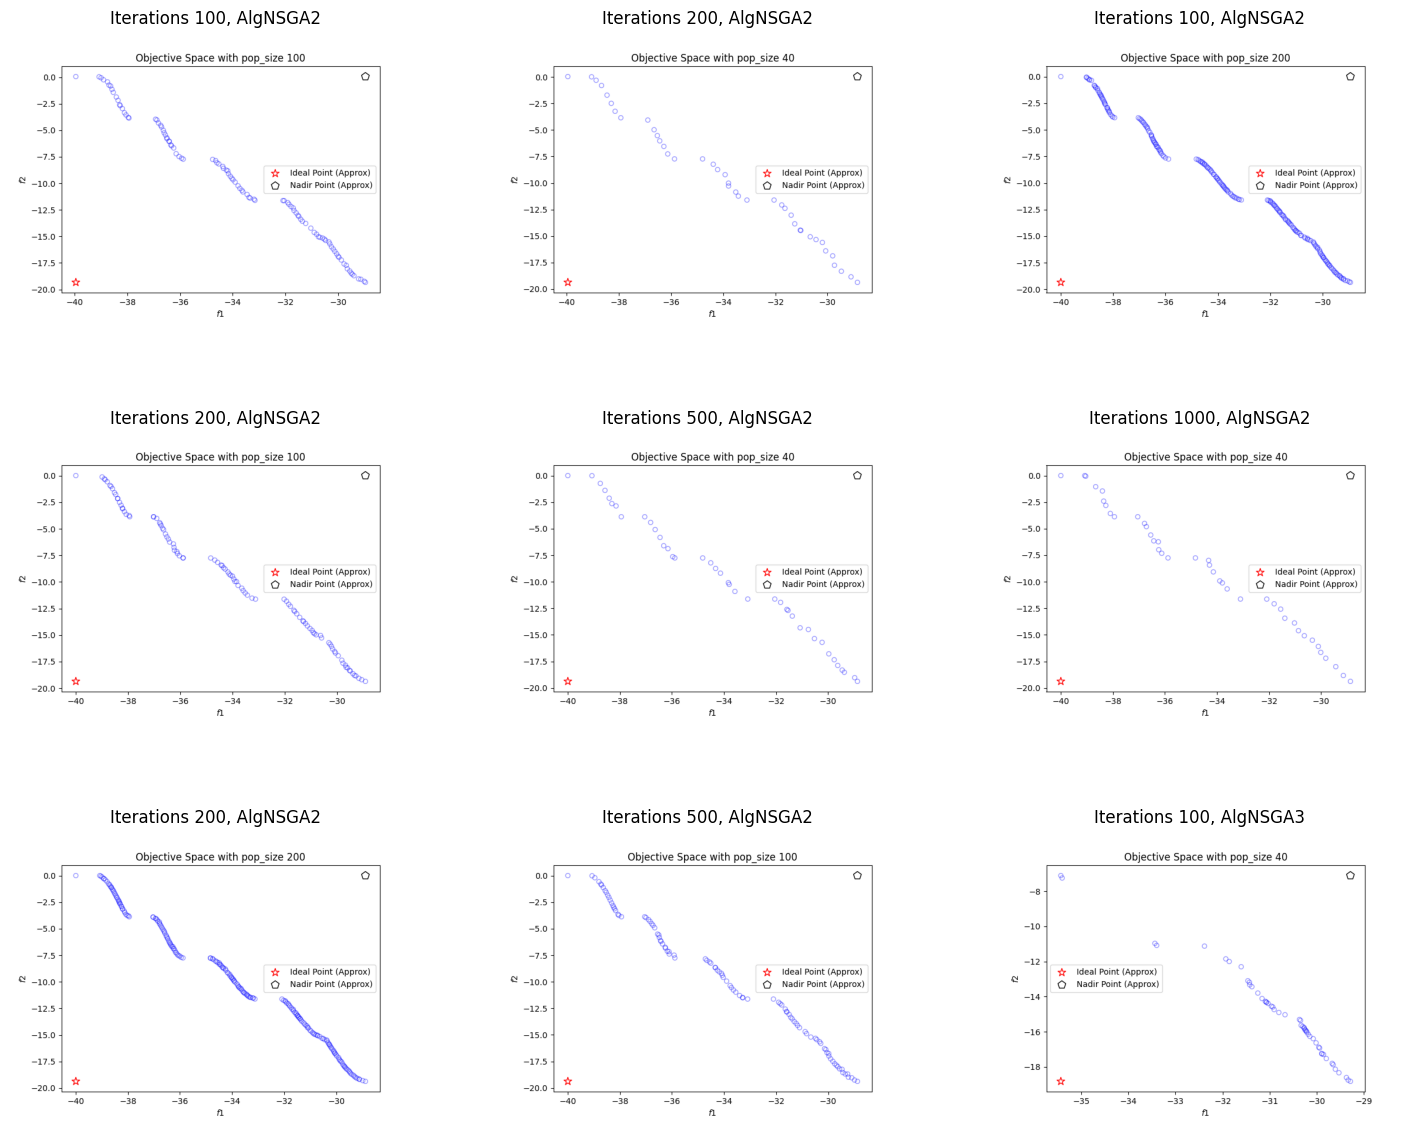

In [321]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = kur1_5['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {kur1_5.Iteration[i]}, Alg{kur1_5.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [338]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(kur1_5['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-25,0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
hv_result(kur1_5)

Global nadir point for kur1 with two variables is :[-25.76   0.62]
ref_point is [-25   0]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,5,40,2.248585,173.175970,0.037211,0.002222
1,KUR1,AGNOMEN,10000,100,2,5,200,2.248668,173.175970,0.037211,0.001904
2,KUR1,AGNOMEN,10000,100,2,5,100,2.114878,173.175970,0.037211,0.001717
3,KUR1,AGNOMEN,20000,200,2,5,40,4.687958,173.574925,0.026986,0.001788
4,KUR1,AGNOMEN,20000,200,2,5,100,4.532005,173.574925,0.026986,0.001699
5,KUR1,AGNOMEN,20000,200,2,5,200,4.597412,173.574925,0.026986,0.003594
6,KUR1,AGNOMEN,50000,500,2,5,40,12.870313,173.778418,0.020657,0.001774
7,KUR1,AGNOMEN,50000,500,2,5,100,12.960926,173.778418,0.020657,0.001673
8,KUR1,AGNOMEN,50000,500,2,5,200,12.939636,173.778418,0.020657,0.001661
9,KUR1,AGNOMEN,100000,1000,2,5,200,25.055521,173.749861,0.024895,0.001703


In [339]:
ref_point = np.array([-1, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/kur1_5_pf' ))
hv_result(kur1_5)

ref_point is [-1  5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,KUR1,AGNOMEN,10000,100,2,5,40,2.248585,832.253047,0.037211,0.001532
1,KUR1,AGNOMEN,10000,100,2,5,200,2.248668,832.253047,0.037211,0.002869
2,KUR1,AGNOMEN,10000,100,2,5,100,2.114878,832.253047,0.037211,0.001640
3,KUR1,AGNOMEN,20000,200,2,5,40,4.687958,833.364004,0.026986,0.001566
4,KUR1,AGNOMEN,20000,200,2,5,100,4.532005,833.364004,0.026986,0.001789
5,KUR1,AGNOMEN,20000,200,2,5,200,4.597412,833.364004,0.026986,0.001548
6,KUR1,AGNOMEN,50000,500,2,5,40,12.870313,833.832652,0.020657,0.001777
7,KUR1,AGNOMEN,50000,500,2,5,100,12.960926,833.832652,0.020657,0.001565
8,KUR1,AGNOMEN,50000,500,2,5,200,12.939636,833.832652,0.020657,0.001780
9,KUR1,AGNOMEN,100000,1000,2,5,200,25.055521,833.829697,0.024895,0.001683
